In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load data from CSV file
data = pd.read_csv("results.csv")
print(data)

    Hours  StudentId  Result
0       1         10       0
1       1         15       0
2       1         21       0
3       1         16       0
4       2         14       0
5       2          5       1
6       2          7       0
7       2          2       1
8       2         17       0
9       3         18       1
10      3          6       1
11      3         20       1


In [3]:
# Assuming the last column is the target column and rest are features
X = data.loc[:, ["Hours", "StudentId"]]  # Features
y = data["Result"]  # Target
new=pd.DataFrame(X,y)
print(new)

        Hours  StudentId
Result                  
0           1         10
0           1         10
0           1         10
0           1         10
0           1         10
1           1         15
0           1         10
1           1         15
0           1         10
1           1         15
1           1         15
1           1         15


In [4]:
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Initialize Naive Bayes classifier
classifier = GaussianNB()

In [6]:
# Train the classifier
classifier.fit(X_train, y_train)

GaussianNB()

In [7]:
# Predict on the test set
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 0]


In [57]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [58]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [59]:
# Calculate false percentage
false_percentage = (1 - accuracy) * 100
print("False Percentage:", false_percentage)

False Percentage: 0.0


In [60]:
new=pd.DataFrame(X_test,y_pred)
print(new)

   Hours  StudentId
1    NaN        NaN
1    NaN        NaN
0    1.0       10.0


In [61]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[1, 0],
       [0, 2]], dtype=int64)

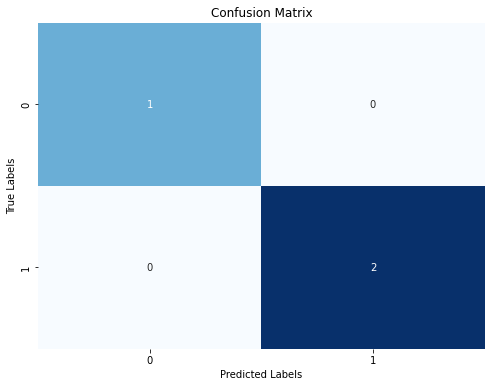

In [62]:
import matplotlib.pyplot as plt
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
